In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [3]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/5
938/938 [==============================] - 104s 109ms/step - loss: 0.1871 - accuracy: 0.9430 - val_loss: 0.0631 - val_accuracy: 0.9786
Epoch 2/5
938/938 [==============================] - 36s 39ms/step - loss: 0.0511 - accuracy: 0.9844 - val_loss: 0.0455 - val_accuracy: 0.9851
Epoch 3/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0360 - accuracy: 0.9887 - val_loss: 0.0337 - val_accuracy: 0.9891
Epoch 4/5
938/938 [==============================] - 39s 41ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0443 - val_accuracy: 0.9858
Epoch 5/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0230 - accuracy: 0.9930 - val_loss: 0.0290 - val_accuracy: 0.9913


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 3s 8ms/step - loss: 0.0290 - accuracy: 0.9913
Test accuracy: 0.9912999868392944


In [8]:
model.save('path_to_save_model.h5')

c:\Users\alans\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2s 7ms/step


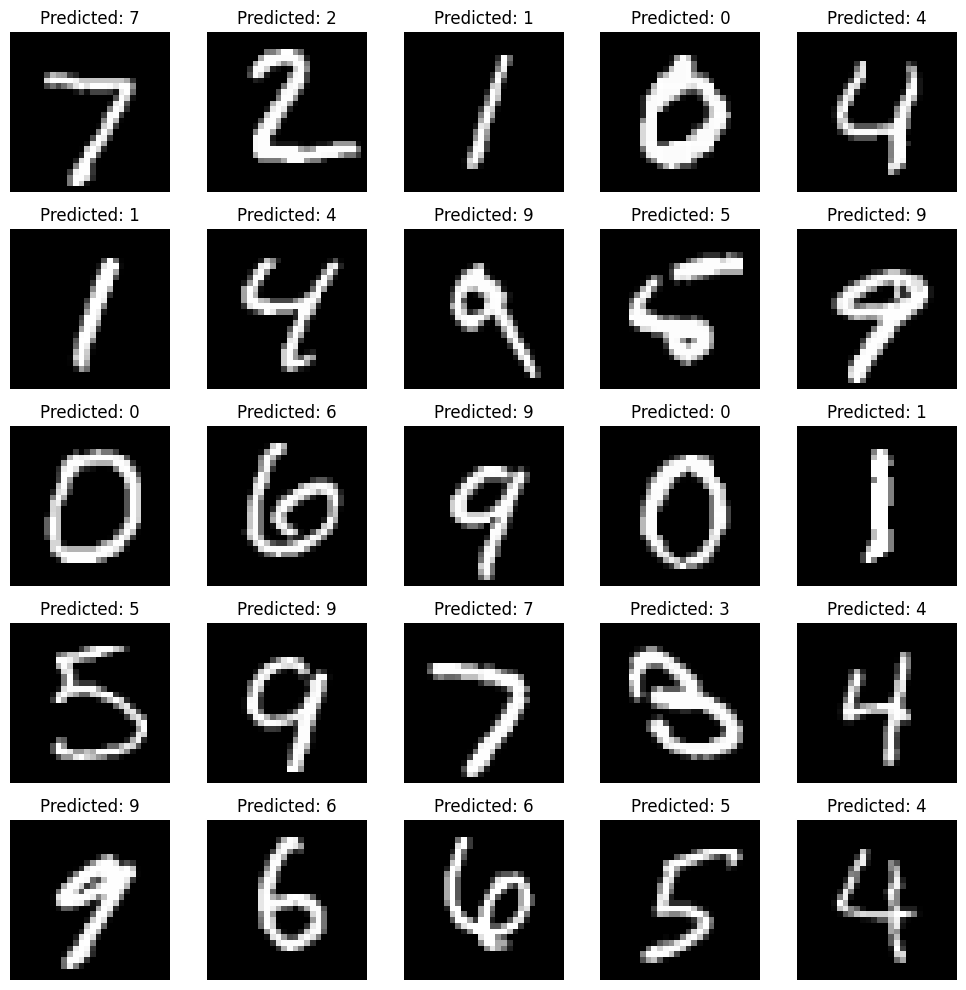

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def display_predictions(images, labels, predictions):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Predicted: {predictions[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load the MNIST test images and preprocess
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Load the trained model from the specified path
model = tf.keras.models.load_model('path_to_save_model.h5')

# Make predictions on test images
predictions = model.predict(test_images)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Display some sample predictions
sample_images = test_images[:25]
sample_labels = test_labels[:25]
sample_predictions = predicted_labels[:25]

display_predictions(sample_images, sample_labels, sample_predictions)
